In [2]:
import numpy as np
import matplotlib.pyplot as pl

In [3]:
!head pk_EAGLE_norm.dat

# log(k/ h Mpc^-1)  log(P(k)/ h^-3 Mpc^3) - normalised version of EAGLE P(k) made by CMB 07/01/2019 using Leiden initial cond web page
  1.0000000E-06   5.505970    
  1.0232935E-06   5.629153    
  1.0471285E-06   5.755237    
  1.0715198E-06   5.883997    
  1.0964781E-06   6.015657    
  1.1220189E-06   6.150271    
  1.1481535E-06   6.287889    
  1.1748980E-06   6.428566    
  1.2022642E-06   6.572412    


In [4]:
!head pk_WDM33_COCO_WMAP7.dat

      -5.1486030      -20.424507
      -4.1486030      -16.457506
      -4.0038381      -15.883285
      -3.8590741      -15.309127
      -3.7143080      -14.735069
      -3.5695429      -14.161228
      -3.4247789      -13.587780
      -3.2800140      -13.015024
      -3.1352489      -12.443451
      -2.9904850      -11.873754


In [21]:
!head pk_WDMDove.dat  

 # k (h Mpc^{-1})     P(k) h^{3} Mpc^{-3}  | DOVE WDM 1.5kev, made by APC; no meaningful normalization [P(k=0.1 h Mpc^-1) scaled to match pk_MillGas_norm]
  7.102267e-06 4.184092e+01
  7.102267e-05 3.877941e+02
  9.912016e-05 5.352149e+02
  1.383331e-04 7.385743e+02
  1.930599e-04 1.018953e+03
  2.694369e-04 1.405077e+03
  3.760287e-04 1.935781e+03
  5.247905e-04 2.662669e+03
  7.324045e-04 3.652542e+03


In [73]:
!head pk_Mill_pch.dat

# k (h Mpc^{-1})     P(k) h^{3} Mpc^{-3} 
 1.0E-6 6.2111907
 1.0280447E-6 6.385382
 1.0568759E-6 6.5644583
 1.0865157E-6 6.7485556
 1.1169867E-6 6.937818
 1.1483123E-6 7.132387
 1.1805164E-6 7.3324122
 1.2136237E-6 7.5380482
 1.2476594E-6 7.74945


In [61]:
cdm_eagle = np.genfromtxt('./pk_EAGLE_norm.dat')
# Contrary to the headers, neither column is log
cdm_eagle_k = cdm_eagle[:,0] # h/Mpc
cdm_eagle_Pk = cdm_eagle[:,1] # (Mpc/h)^3

In [75]:
cdm_mill = np.genfromtxt('./pk_Mill_pch.dat')
cdm_mill_k = cdm_mill[:,0] # h/Mpc
cdm_mill_Pk = cdm_mill[:,1] # (Mpc/h)^3

In [62]:
wdm_eagle = np.genfromtxt('./pk_WDMDove.dat')
wdm_eagle_k = wdm_eagle[:,0] # h/Mpc
wdm_eagle_Pk = wdm_eagle[:,1] # (Mpc/h)^3

In [95]:
wdm_coco = np.genfromtxt('./delta2_WDM33_COCO_WMAP7.dat')

# Clearly the values are log already, but the units are not clear.
# Experimentation suggests these are Delta^2 = k^3 P_k/(2pi^2)

wdm_coco_k = 10**wdm_coco[:,0] # h Mpc^-1
wdm_coco_delta2 = 10**wdm_coco[:,1] # h^-3 Mpc^3

wdm_coco_Pk = wdm_coco_delta2 * 2.0 * np.pi**2 / (wdm_coco_k**3.0)

# Normalize to Eagle around the peak, requires interpolation
wdm_coco_Pk_interp = np.interp(cdm_eagle_k[0:600], wdm_coco_k[0:100], wdm_coco_Pk[0:100])
inorm = np.argmax(cdm_eagle_Pk[0:600])
norm_fac_coco_wdm = cdm_eagle_Pk[0:600][inorm] / wdm_coco_Pk_interp[inorm]

In [118]:
with open('pk_WDM33_COCO_WMAP7.dat','w') as f:
    f.write('# k (h Mpc^{-1})     P(k) h^{3} Mpc^{-3}\n')
    for i in range(0,len(wdm_coco_Pk)):
        f.write('{:15.7e} {:15.7e}\n'.format(wdm_coco_k[i], wdm_coco_Pk[i]))

In [96]:
# Normalize Mill to Eagle around the peak, requires interpolation
cdm_mill_Pk_interp = np.interp(cdm_eagle_k[0:600], cdm_mill_k[0:600], cdm_mill_Pk[0:600])
inorm = np.argmax(cdm_eagle_Pk[0:600])
norm_fac_mill = cdm_eagle_Pk[0:600][inorm] / cdm_mill_Pk_interp[inorm]

In [97]:
# Normalize Eagle WDM to Eagle around the peak, requires interpolation
wdm_eagle_Pk_interp = np.interp(cdm_eagle_k[0:600], wdm_eagle_k[0:600], wdm_eagle_Pk[0:600])
inorm = np.argmax(cdm_eagle_Pk[0:600])
norm_fac_eagle_wdm = cdm_eagle_Pk[0:600][inorm] / wdm_eagle_Pk_interp[inorm]

(-6.0, 7.5)

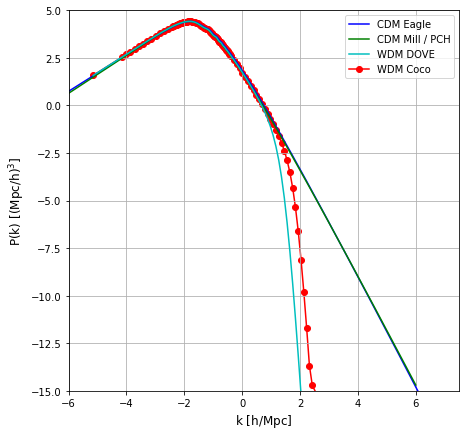

In [127]:
pl.figure(figsize=(7,7))

# CDM Eagle
pl.plot(np.log10(cdm_eagle_k),np.log10(cdm_eagle_Pk),c='b',label='CDM Eagle')
# CDM Millennium (from PCH)
pl.plot(np.log10(cdm_mill_k),np.log10(cdm_mill_Pk*norm_fac_mill),c='g',label='CDM Mill / PCH')
# WDM Eagle (renormalized already)
pl.plot(np.log10(wdm_eagle_k),np.log10(wdm_eagle_Pk*norm_fac_eagle_wdm),c='c',label='WDM DOVE')

# Renormalized WDM COCO
pl.plot(np.log10(wdm_coco_k),np.log10(wdm_coco_Pk*norm_fac_coco_wdm),c='r',label='WDM Coco',marker='o',zorder=-10)

pl.legend();
pl.grid()
pl.xlabel(r"$\mathrm{k\ [h/Mpc]}$",fontsize=12)
pl.ylabel(r"$\mathrm{P(k)\ [(Mpc/h)^3]}$",fontsize=12)
pl.ylim(-15,5)
pl.xlim(-6,7.5)

(3.5, 4.6)

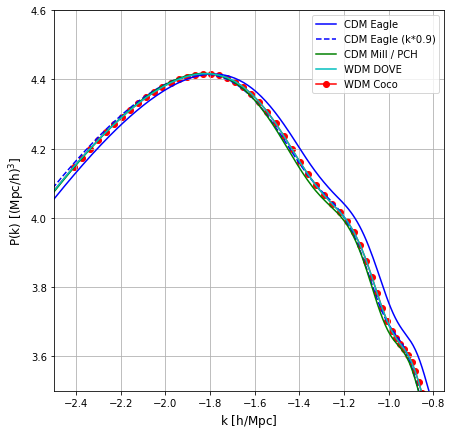

In [123]:
pl.figure(figsize=(7,7))

# CDM Eagle
pl.plot(np.log10(cdm_eagle_k),np.log10(cdm_eagle_Pk),c='b',label='CDM Eagle')
pl.plot(np.log10(cdm_eagle_k*0.9),np.log10(cdm_eagle_Pk),c='b',label='CDM Eagle (k*0.9)',ls='--')
# CDM Millennium (from PCH)
pl.plot(np.log10(cdm_mill_k),np.log10(cdm_mill_Pk*norm_fac_mill),c='g',label='CDM Mill / PCH')
# WDM Eagle (renormalized already)
pl.plot(np.log10(wdm_eagle_k),np.log10(wdm_eagle_Pk*norm_fac_eagle_wdm),c='c',label='WDM DOVE')

# Renormalized WDM COCO
pl.plot(np.log10(wdm_coco_k),np.log10(wdm_coco_Pk*norm_fac_coco_wdm),c='r',label='WDM Coco',marker='o',zorder=-10)

pl.legend();
pl.grid()
pl.xlabel(r"$\mathrm{k\ [h/Mpc]}$",fontsize=12)
pl.ylabel(r"$\mathrm{P(k)\ [(Mpc/h)^3]}$",fontsize=12)

pl.xlim(-2.5,-0.75)
pl.ylim(3.5,4.6)

(-4.0, 5.0)

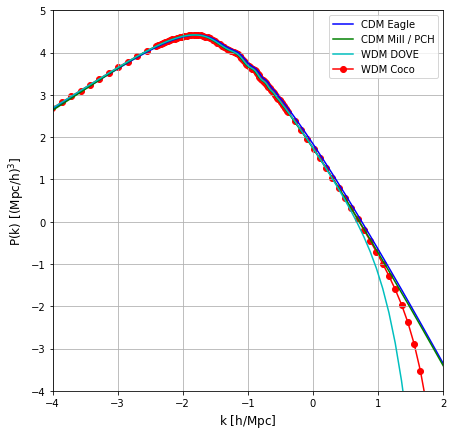

In [106]:
pl.figure(figsize=(7,7))

# CDM Eagle
pl.plot(np.log10(cdm_eagle_k),np.log10(cdm_eagle_Pk),c='b',label='CDM Eagle')
# CDM Millennium (from PCH)
pl.plot(np.log10(cdm_mill_k),np.log10(cdm_mill_Pk*norm_fac_mill),c='g',label='CDM Mill / PCH')
# WDM Eagle (renormalized already)
pl.plot(np.log10(wdm_eagle_k),np.log10(wdm_eagle_Pk*norm_fac_eagle_wdm),c='c',label='WDM DOVE')

# Renormalized WDM COCO
pl.plot(np.log10(wdm_coco_k),np.log10(wdm_coco_Pk*norm_fac_coco_wdm),c='r',label='WDM Coco',marker='o',zorder=-10)

pl.legend();
pl.grid()
pl.xlabel(r"$\mathrm{k\ [h/Mpc]}$",fontsize=12)
pl.ylabel(r"$\mathrm{P(k)\ [(Mpc/h)^3]}$",fontsize=12)

pl.xlim(-4,2)
pl.ylim(-4,5)